# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly
from pandas_profiling import ProfileReport

In [299]:
data = pd.read_csv('u.data',sep='\t')

In [300]:
data.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [301]:
data.columns =['User_id','item_id','Rating','TimeStamp']

In [302]:
df = data.copy()

In [303]:
df.head()

,User_id,item_id,Rating,TimeStamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [304]:
Movie_Tiles = pd.read_csv('Movie_Id_Titles',sep=',')

In [305]:
Movie_Tiles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merge the both dataframe on the columns name i.e.`item_id`

In [306]:
data = df.merge(Movie_Tiles,on='item_id')

In [307]:
data.head()

,User_id,item_id,Rating,TimeStamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


## EDA

In [308]:
data.head()

,User_id,item_id,Rating,TimeStamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [309]:
pd.options.plotting.backend = 'plotly'

In [310]:
data.groupby(data['title']).size().sort_values(ascending=False)[:30].plot(kind='barh')

In [311]:
data.groupby('Rating').size().sort_values(ascending=False).plot(kind='bar',title='Rating Count')

### Rating Distribution.

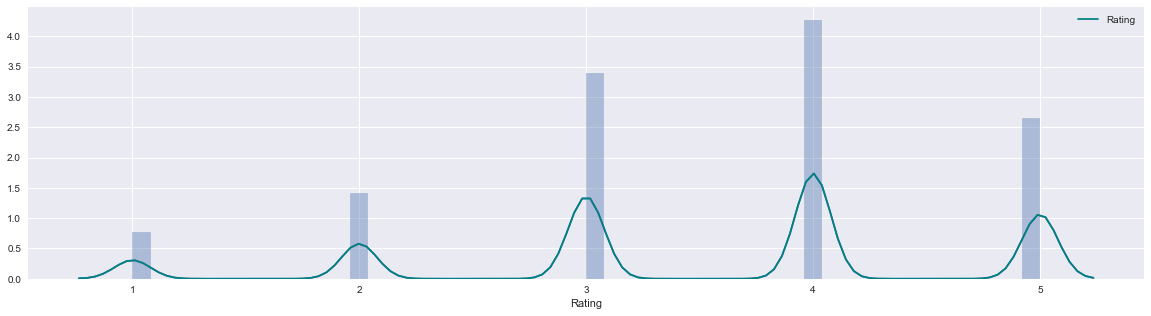

In [312]:
plt.figure(figsize=(20,5))
ax = sns.distplot(data['Rating'])
sns.kdeplot(data['Rating'],color='teal')
plt.show()

Rating distribution is in the form of multimodel that indicates that high amount of variability present inside the Rating data.

### Let's create a ratings dataframe with average rating and number of ratings:

In [340]:
Avg_Rating=data.groupby('title').mean()['Rating'].sort_values(ascending=False)

In [342]:
Count_rating = data.groupby('title').count()['Rating'].sort_values(ascending=False) 

In [343]:
Rating= pd.DataFrame(Avg_Rating)
Rating.head()

,Rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


In [344]:
Rating['Count Rating'] = pd.DataFrame(Count_rating)

In [345]:
Rating.head()

,Rating,Count Rating
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1


In [346]:
plt.figure(figsize=(10,4))
Rating['Count Rating'].hist(bins=70,title='Rating Count')

<Figure size 720x288 with 0 Axes>

In [347]:
plt.figure(figsize=(10,4))
Rating['Rating'].hist(bins=70,title='Mean Rating Count')

<Figure size 720x288 with 0 Axes>

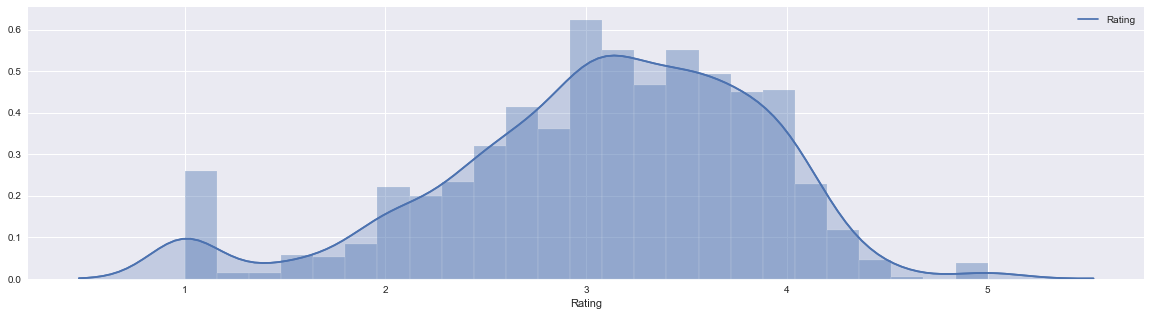

In [348]:
plt.figure(figsize=(20,5))
ax = sns.distplot(Rating['Rating'])
sns.kdeplot(Rating['Rating'],color='b',shade=True)
plt.show()

In [321]:
Rating['Rating'].plot(kind='box')

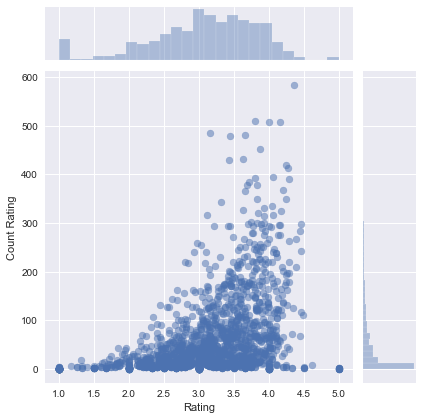

In [322]:
sns.jointplot(x='Rating',y='Count Rating',data=Rating,alpha=0.5)
plt.show()

## Recommending Similar Movies

- Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [349]:
pivot_table = data.pivot_table(values='Rating',index='User_id',columns='title')

In [350]:
pd.pandas.set_option('max_columns',None)

In [351]:
pivot_table.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
User_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
User_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
User_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
User_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
User_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                             NaN               NaN   
3                 NaN                             NaN               NaN   
4                 NaN                             NaN               NaN   

title    A Chef in Love (1996)  Above the Rim (1994)  Absolute Power (1997)  \
User_id                                                                       
0                          NaN                   NaN                    NaN   
1                          NaN                   NaN                    NaN   
2                          NaN                   NaN                    3.0   
3                          NaN                   NaN                    NaN   
4                          NaN                   NaN                    NaN   

title    Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
User_id                                                         
0                      NaN                                NaN   
1                      3.0                                3.0   
2                      NaN                                NaN   
3                      NaN                                NaN   
4                      NaN                                NaN   

title    Ace Ventura: When Nature Calls (1995)  Across the Sea of Time (1995)  \
User_id                                                                         
0                                          NaN                            NaN   
1                                          NaN                            NaN   
2       

- We have created the pivot table so that we will get the recommendation movie on the basis of User_id and rating.
- Because if wee see the high Count of Rating is avalible for the Stars Wars movie.
- user_id will be helpfull to get the recommendation of next movie on the basis of the Rating.

In [352]:
Rating.sort_values('Count Rating',ascending=False)
Rating.head(10)

,Rating,Count Rating
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
"Great Day in Harlem, A (1994)",5.0,1
They Made Me a Criminal (1939),5.0,1


- If we see above we have the Rating count for the Stars Wars is high.WE will apply correlation to recommnded the next movie.
- Suppose we have the Consider the StarWars and Liar Liar and make the corelation with pivot table that we have created so that we will recommend

In [327]:
Rating_starWars = pivot_table['Star Wars (1977)']
Rating_LierLier = pivot_table['Liar Liar (1997)']
Rating_starWars.head()

User_id
0    NaN
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64


**In the above we can see that the for the particular `user_id` with the given rating.In this if we see the user_id with o and 3 is showing the NaN values that means may be they don't see that movie.**

#### By using the Funtion that `corrwith` we wil going to correlate the `Rating_starwars` with the `pivot_table` that we have made. 

In [328]:
correlation_StarsWars = pivot_table.corrwith(Rating_starWars)
Correlation_LierLier  = pivot_table.corrwith(Rating_LierLier)
correlation_StarsWars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [329]:
Corr_starswars = pd.DataFrame(correlation_StarsWars,columns=['Correlation'])
Corr_starswars.dropna(inplace=True)
Corr_starswars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


- According to Correlation principle that If we have value 1 that means highest correlation and If it is -1 thats means It is showing that is lowest Correlation.
- Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

- By doing the sort operation we will get the sorted values with Correlation that will help us to get the higher correlation.

In [330]:
Corr_starswars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


It is now good but we dont know the count of vote for the each movie has given we want the only those movie which having highest number of the vote Count.

In [331]:
corr_starwars = Corr_starswars.join(Rating['Count Rating'])
corr_starwars.head()

,Correlation,Count Rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


**Now sort the values and notice how the titles make a lot more sense:**

In [332]:
Final_Correlation_starwars=corr_starwars[corr_starwars['Count Rating']>100].sort_values('Correlation',ascending=False)
Final_Correlation_starwars.head()

,Correlation,Count Rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


- In this way we can remmended many more movie the After watching the Stars Wars movie.
- There are also we can say,that the recommedation is happpen on the majority of Count of Rating and correlation.

In [333]:
Final_Correlation_starwars[:20].plot(kind='bar',x=Final_Correlation_starwars.index[:20],y='Correlation')

## Lets do for the LierLier Movie Same 

In [334]:
high_correlated_lierlier=Correlation_LierLier.sort_values(ascending=False)
high_correlated_lierlier.dropna(inplace=True)
high_correlated_lierlier.head()

title
For Ever Mozart (1996)     1.0
Mina Tannenbaum (1994)     1.0
Johnny 100 Pesos (1993)    1.0
Of Human Bondage (1934)    1.0
Legal Deceit (1997)        1.0
dtype: float64

In [335]:
high_correlated_lierlier = pd.DataFrame(high_correlated_lierlier,columns=['Correlation'],index=high_correlated_lierlier.index)
high_correlated_lierlier.head()

,Correlation
title,
For Ever Mozart (1996),1.0
Mina Tannenbaum (1994),1.0
Johnny 100 Pesos (1993),1.0
Of Human Bondage (1934),1.0
Legal Deceit (1997),1.0


In [336]:
high_correlated_lierlier=high_correlated_lierlier.join(Rating['Count Rating'])

In [337]:
High_recommended_movies_lierlier=high_correlated_lierlier[high_correlated_lierlier['Count Rating']>100].sort_values('Correlation',ascending=False)

In [338]:
High_recommended_movies_lierlier

,Correlation,Count Rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


In [339]:
High_recommended_movies_lierlier[:20].plot(x=High_recommended_movies_lierlier.index[:20],y='Correlation',kind='bar')

**This is how we can see the LiarLiar and StarWars Recommendation System.**

## Thank You !!